<a href="https://colab.research.google.com/github/gno-lit/DSI/blob/main/Pre-assignment/DSI_pre_assignment_(data_science).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION
This is my submission for the DSI pre-assignment for Datascience with Pandas and Movie Data.

Github account is found [here](https://github.com/gno-lit)

The repo for the assignment can be found [here](https://github.com/gno-lit/DSI)





## A
#### Mounting drive to colab and downloading files to colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
downloaded = drive.CreateFile({'id': '1wWbLYAsVldXrnOxdJlu4URsPynYykY22'}) 
downloaded.GetContentFile('title.ratings.tsv.gz')  

In [4]:
downloaded = drive.CreateFile({'id':'1ctjnShHP2qNA1l2nKi1l4qWe3hE5SsPH'}) 
downloaded.GetContentFile('title.basics.tsv.gz')

In [5]:
downloaded = drive.CreateFile({'id': '1jHKr1FOCigt15gVhrNmtHCHRgzzR1ZGc'}) 
downloaded.GetContentFile('title.akas.tsv.gz')

#### Imports

In [6]:
import pandas as pd
import numpy as np
import gzip
import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings

<function warnings.filterwarnings>

### 1 
#### Reading the files into three separate dataframes using the read_csv method in Pandas. 

In [7]:
# using gzip to extract zipped files and storing the files in the list with name 'df_names'
df_names = ['title.basics.tsv.gz', 'title.akas.tsv.gz', 'title.ratings.tsv.gz']
df_list = []
for i in tqdm.tqdm(range(len(df_names))):
    with gzip.open(df_names[i], 'rb') as f:
        df = pd.read_csv(f, delimiter="\t",engine='c')
        df_list.append(df)

# Assigning actual file names to list content       
basics_df, akas_df, ratings_df = df_list[0],df_list[1],df_list[2]

  0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
 33%|███▎      | 1/3 [00:14<00:29, 14.69s/it]/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
100%|██████████| 3/3 [00:22<00:00,  7.37s/it]


### 2
#### Drop duplicates in all the dataframes, if there are any

In [8]:
for i in tqdm.tqdm(range(len(df_list))):
    if df_list[i].duplicated() is False:
      print('There are no duplicate values')
    else:
       df_list[i].drop_duplicates(inplace= True)
        

100%|██████████| 3/3 [00:35<00:00, 11.91s/it]


### 3
#### Combining all three dataframes on Title ID (titleID or tconst) using Pandas 'merge' and saving it into a new dataframe. 

   



> #### Inner Merge



In [9]:
df_inner = pd.merge(pd.merge(basics_df, ratings_df, on='tconst'),
                    akas_df, left_on='tconst',right_on= 'titleId')
df_inner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686547 entries, 0 to 1686546
Data columns (total 19 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   tconst           1686547 non-null  object 
 1   titleType        1686547 non-null  object 
 2   primaryTitle     1686547 non-null  object 
 3   originalTitle    1686547 non-null  object 
 4   isAdult          1686547 non-null  int64  
 5   startYear        1686547 non-null  object 
 6   endYear          1686547 non-null  object 
 7   runtimeMinutes   1686547 non-null  object 
 8   genres           1686547 non-null  object 
 9   averageRating    1686547 non-null  float64
 10  numVotes         1686547 non-null  int64  
 11  titleId          1686547 non-null  object 
 12  ordering         1686547 non-null  int64  
 13  title            1686547 non-null  object 
 14  region           1686539 non-null  object 
 15  language         1686547 non-null  object 
 16  types            1

In [10]:
df_inner['titleType'].nunique()

10



> > ##### For the inner merge ( intersection of the two dataframes), there are 1686547 resulting lines and 10 unique title types








> Outer Merge



In [11]:
df_outer = pd.merge(pd.merge(basics_df, ratings_df, how='outer', on='tconst'), 
                    akas_df, left_on='tconst',right_on= 'titleId', how='outer')
df_outer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6740089 entries, 0 to 6740088
Data columns (total 19 columns):
 #   Column           Dtype  
---  ------           -----  
 0   tconst           object 
 1   titleType        object 
 2   primaryTitle     object 
 3   originalTitle    object 
 4   isAdult          float64
 5   startYear        object 
 6   endYear          object 
 7   runtimeMinutes   object 
 8   genres           object 
 9   averageRating    float64
 10  numVotes         float64
 11  titleId          object 
 12  ordering         float64
 13  title            object 
 14  region           object 
 15  language         object 
 16  types            object 
 17  attributes       object 
 18  isOriginalTitle  object 
dtypes: float64(4), object(15)
memory usage: 1.0+ GB


In [12]:
df_outer['titleType'].nunique()

10

In [13]:
df_outer['titleType'].unique()

array(['short', 'movie', 'tvMovie', 'tvSeries', 'tvEpisode', 'tvShort',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', nan],
      dtype=object)


> > For the outer merge (union of the 2 dataframes), there are 6740089 resulting lines and 10 unique title types; *'short', 'movie', 'tvMovie', 'tvSeries', 'tvEpisode', 'tvShort','tvMiniSeries', 'tvSpecial', 'video', 'videoGame', and nan* with null values being the last title type




### 4. 
#### Make a new dataframe 'df_new' by selecting only rows corresponding to English-language films ('en') OR US-region films ('US') AND only those that are movies (using the 'titleType' column).


In [14]:
df_new = df_outer[(df_outer['language']=='en') | (df_outer['region']=='US') & (df_outer['titleType']=='movies')]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133500 entries, 74 to 6739888
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           133499 non-null  object 
 1   titleType        133499 non-null  object 
 2   primaryTitle     133499 non-null  object 
 3   originalTitle    133499 non-null  object 
 4   isAdult          133499 non-null  float64
 5   startYear        133499 non-null  object 
 6   endYear          133499 non-null  object 
 7   runtimeMinutes   133499 non-null  object 
 8   genres           133499 non-null  object 
 9   averageRating    85007 non-null   float64
 10  numVotes         85007 non-null   float64
 11  titleId          133500 non-null  object 
 12  ordering         133500 non-null  float64
 13  title            133500 non-null  object 
 14  region           133500 non-null  object 
 15  language         133500 non-null  object 
 16  types            133500 non-null  ob

In [15]:
df_new.isnull().sum()

tconst                 1
titleType              1
primaryTitle           1
originalTitle          1
isAdult                1
startYear              1
endYear                1
runtimeMinutes         1
genres                 1
averageRating      48493
numVotes           48493
titleId                0
ordering               0
title                  0
region                 0
language               0
types                  0
attributes             0
isOriginalTitle        0
dtype: int64

>>The resulting dataframe has just 133500 entries with numVotes and averageRatings having > 40000 null value entries


### 5
#### Add a new column  'log10Votes' to df_new  which gives the Log_10 number of the 'numVotes' column.

In [16]:
df_new['log10Votes']= np.log10(df_outer['numVotes'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 6
#### Lower the case of all text in the 'genres' column. 

In [17]:
df_new['genres'].str.lower()

74         documentary,short
76         documentary,short
85         documentary,short
131        documentary,short
209        documentary,short
                 ...        
6733462          documentary
6733836          documentary
6734004                short
6734012                short
6739888                  NaN
Name: genres, Length: 133500, dtype: object

###7 
#### Using Groupby (or other technique) group all data by 'genres' and display the top 10 highest genres by:
> `7.1 mean number of log10Votes`

In [18]:
df_new.groupby('genres')['log10Votes'].mean().sort_values(ascending=False)[:10]

genres
Mystery,Romance,Sci-Fi        5.641197
Adventure,Comedy,Music        5.200092
Film-Noir,Mystery,Thriller    5.138634
Film-Noir,Mystery             5.133127
Action,Thriller,War           4.363237
Horror,Musical,Sci-Fi         4.340484
Biography,Fantasy,Horror      4.271842
Adventure,Drama,Sport         4.186613
Adventure,Sci-Fi,Thriller     4.171505
Drama,Sport,Thriller          4.106463
Name: log10Votes, dtype: float64



> `7.2 mean averageRating`





In [19]:
df_new.groupby('genres').mean()['averageRating'].sort_values(ascending=False)[:10]

genres
Documentary,News,Reality-TV    9.500000
Action,Musical,Short           9.100000
Biography,Comedy,Sci-Fi        9.000000
Crime,Drama,News               9.000000
Action,Fantasy,Short           9.000000
Crime,Reality-TV               8.966667
Documentary,Family,Music       8.900000
Comedy,Reality-TV,Talk-Show    8.800000
Documentary,Fantasy            8.733333
Documentary,Family,Fantasy     8.700000
Name: averageRating, dtype: float64

### 8
#### Using 'groupby’ group all data by averageRating and make a scatter plot of averageRating vs log10Votes. 

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


averageRating
1.0     AxesSubplot(0.125,0.125;0.775x0.755)
1.1     AxesSubplot(0.125,0.125;0.775x0.755)
1.2     AxesSubplot(0.125,0.125;0.775x0.755)
1.3     AxesSubplot(0.125,0.125;0.775x0.755)
1.4     AxesSubplot(0.125,0.125;0.775x0.755)
                        ...                 
9.6     AxesSubplot(0.125,0.125;0.775x0.755)
9.7     AxesSubplot(0.125,0.125;0.775x0.755)
9.8     AxesSubplot(0.125,0.125;0.775x0.755)
9.9     AxesSubplot(0.125,0.125;0.775x0.755)
10.0    AxesSubplot(0.125,0.125;0.775x0.755)
Length: 91, dtype: object

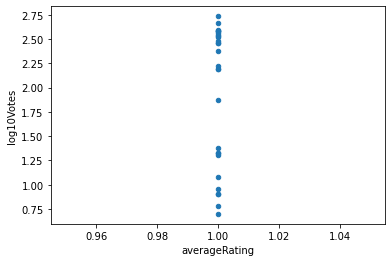

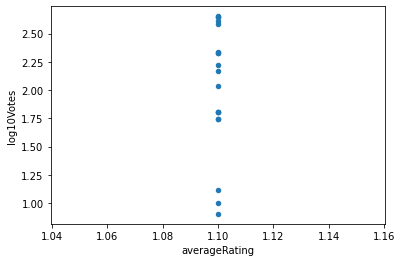

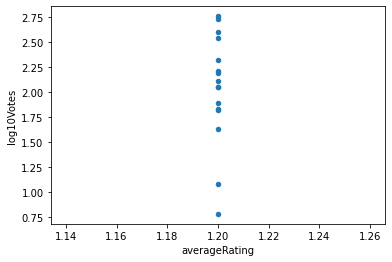

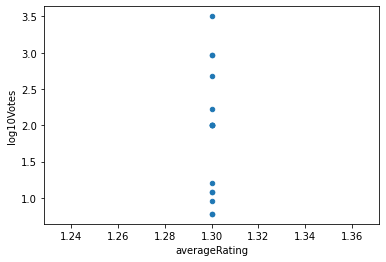

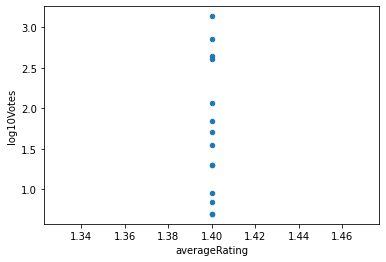

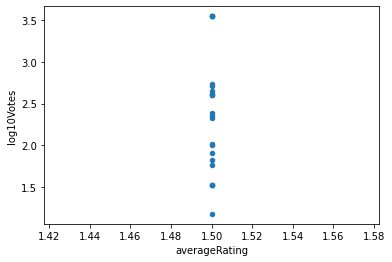

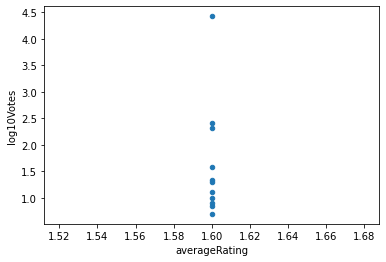

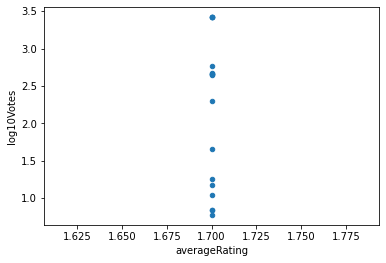

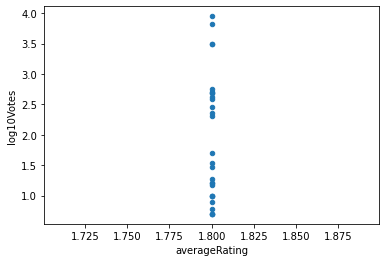

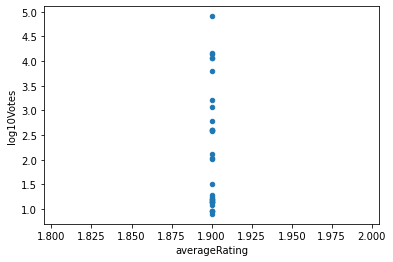

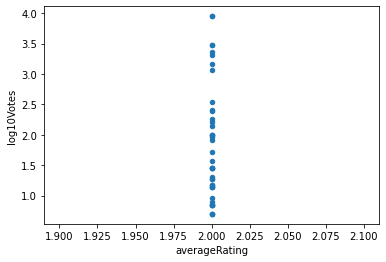

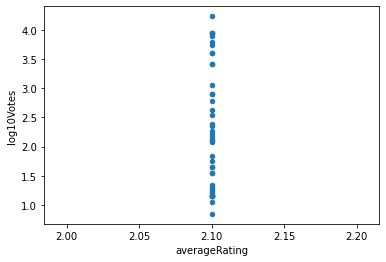

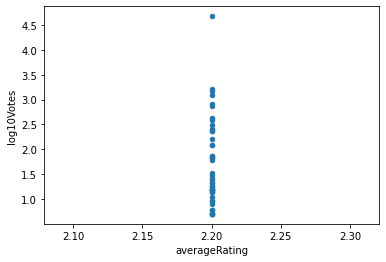

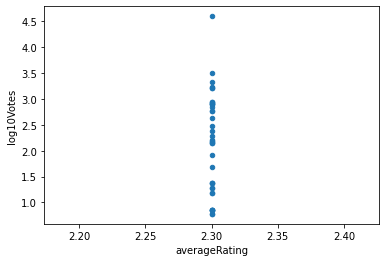

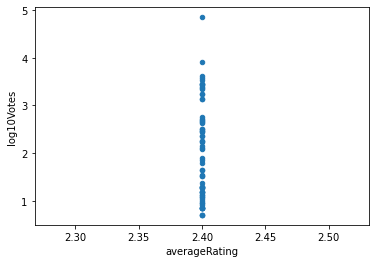

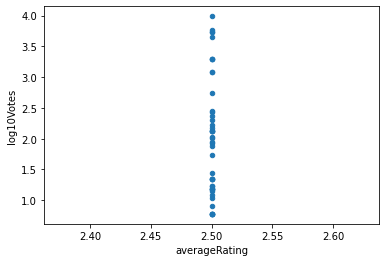

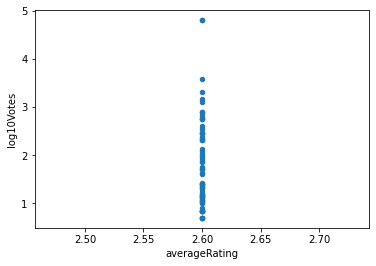

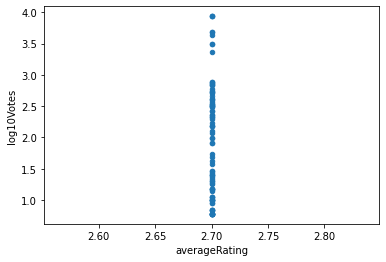

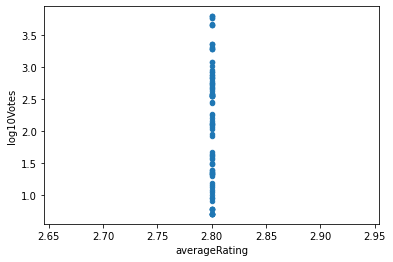

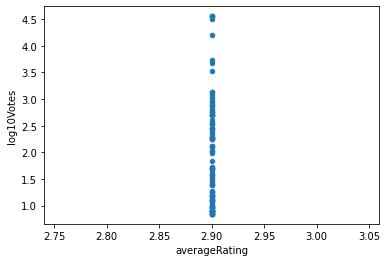

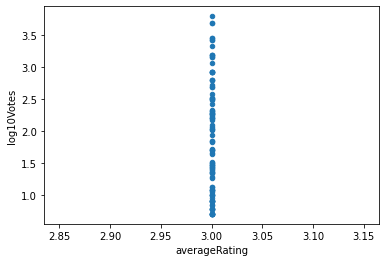

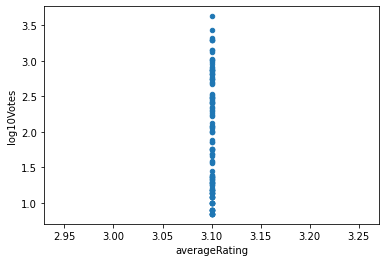

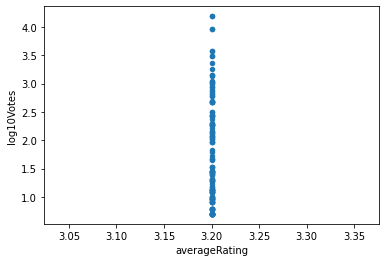

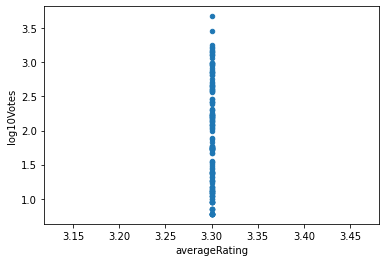

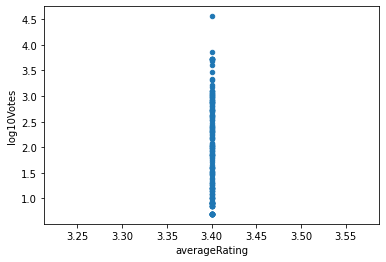

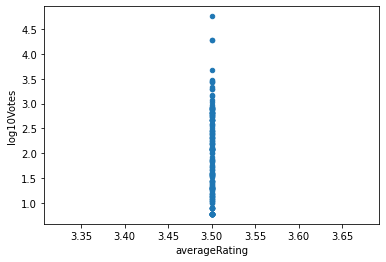

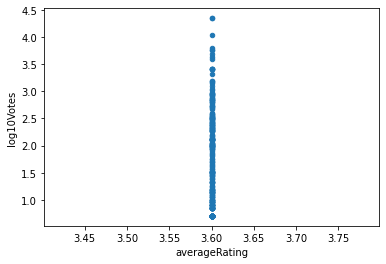

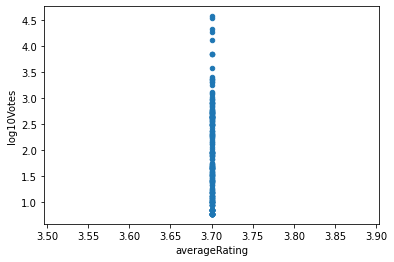

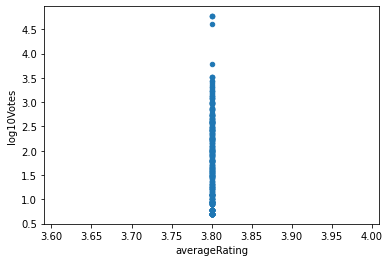

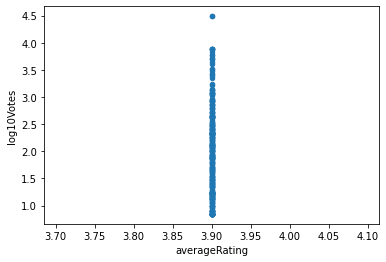

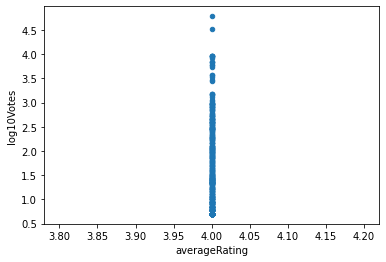

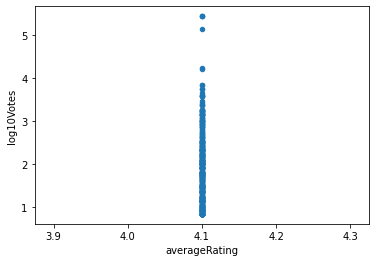

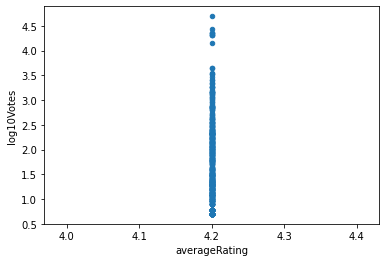

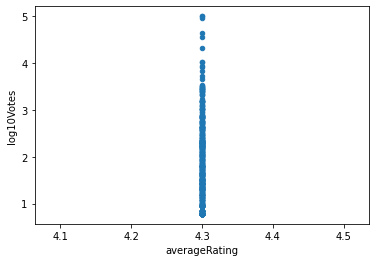

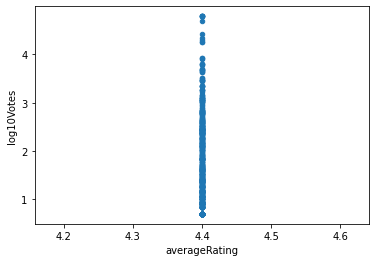

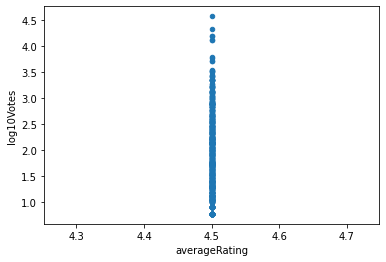

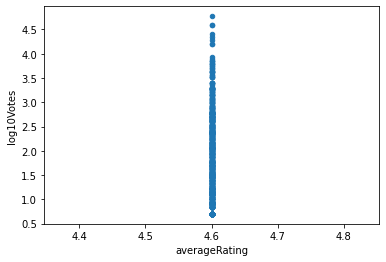

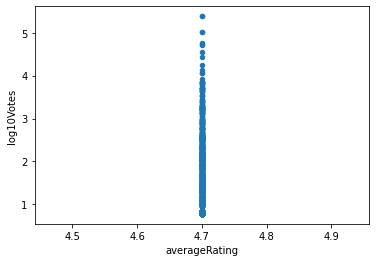

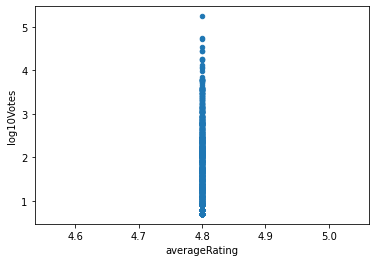

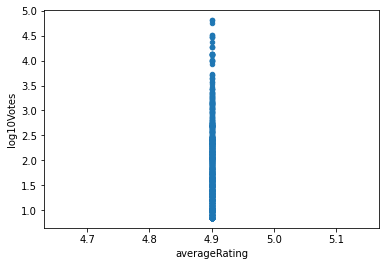

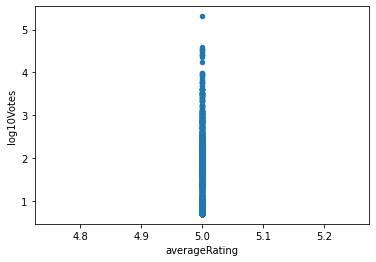

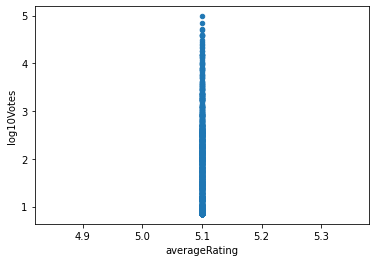

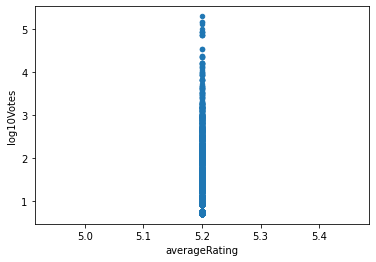

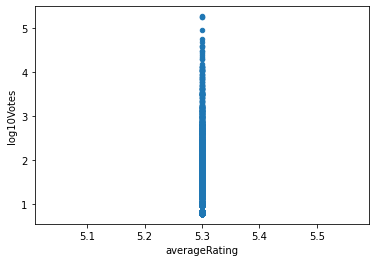

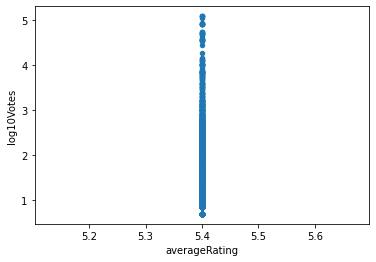

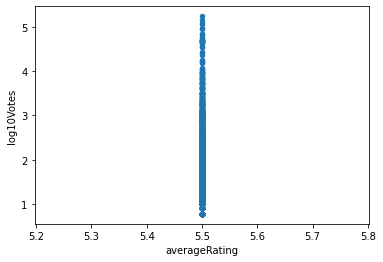

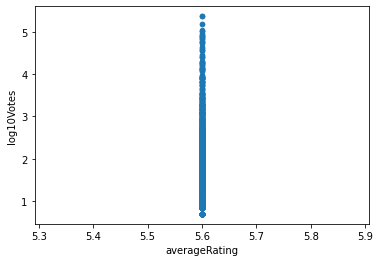

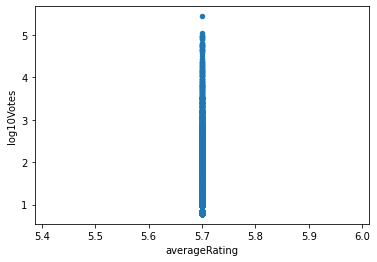

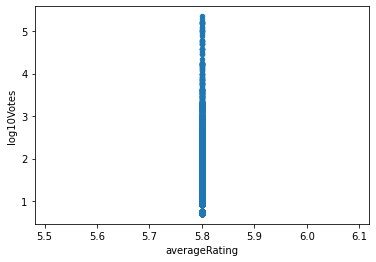

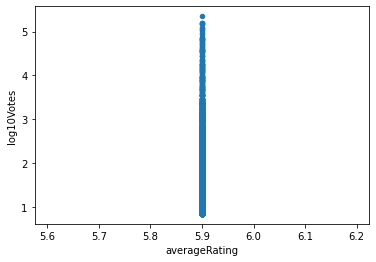

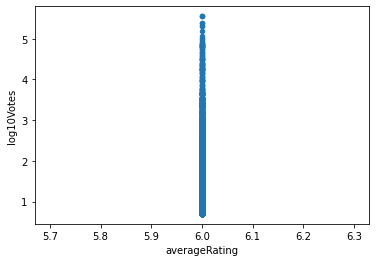

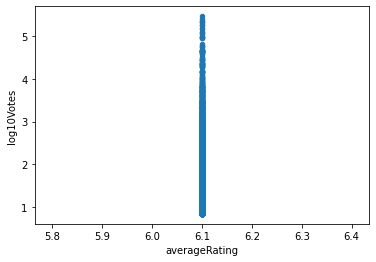

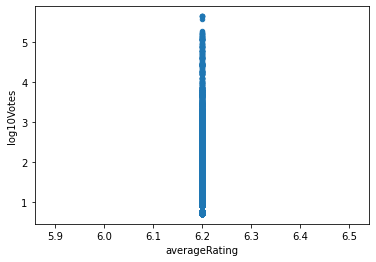

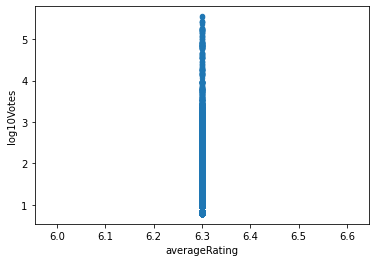

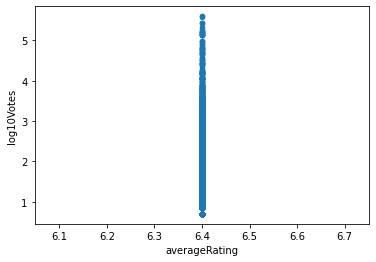

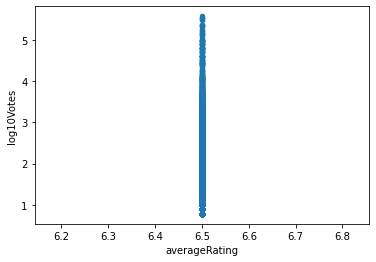

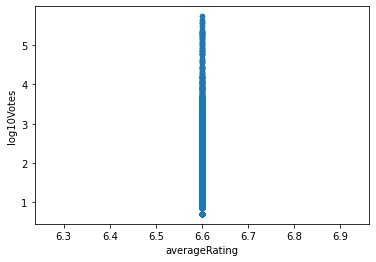

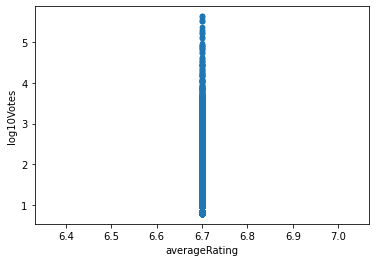

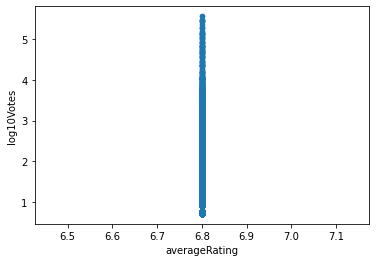

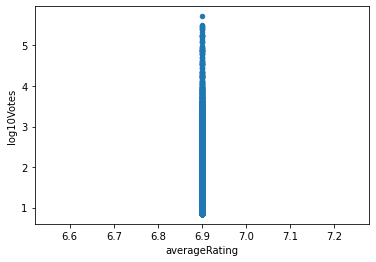

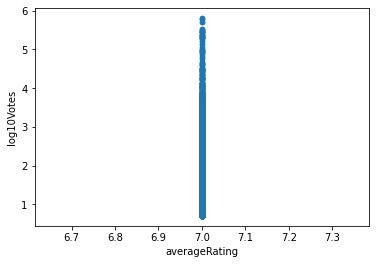

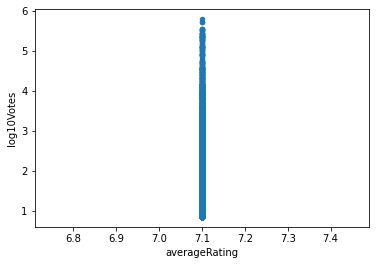

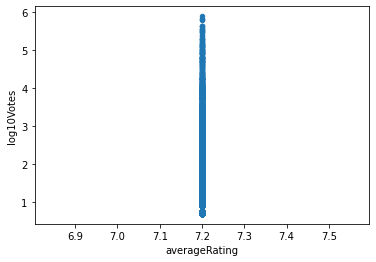

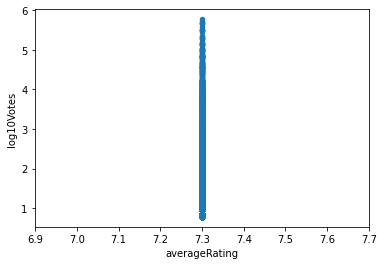

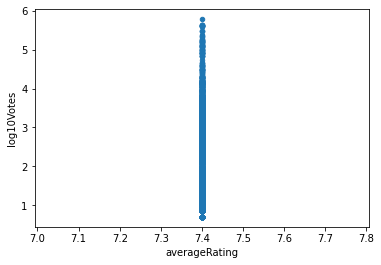

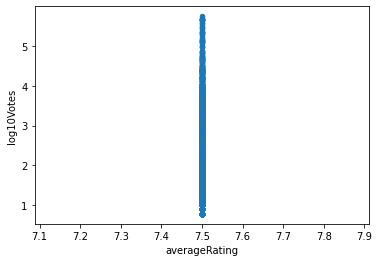

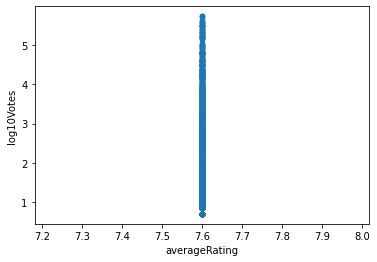

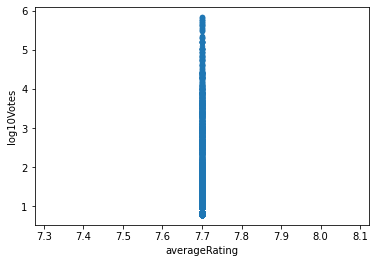

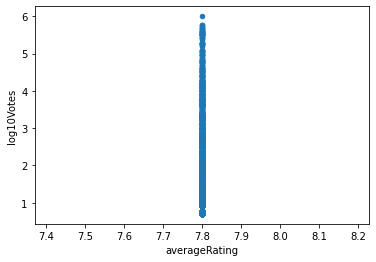

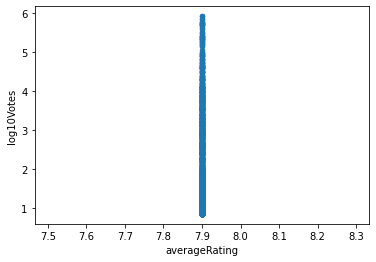

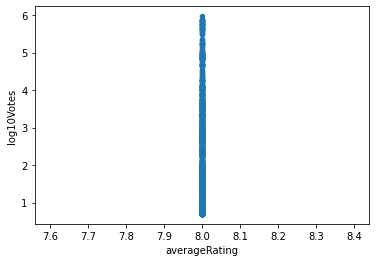

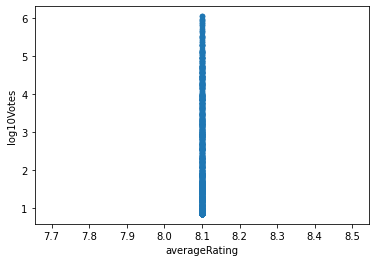

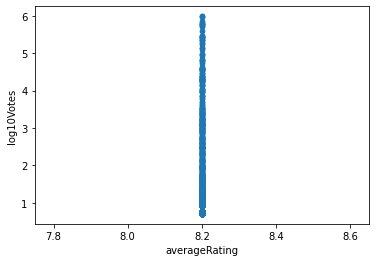

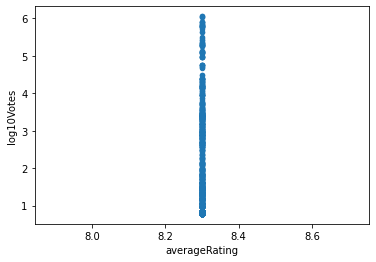

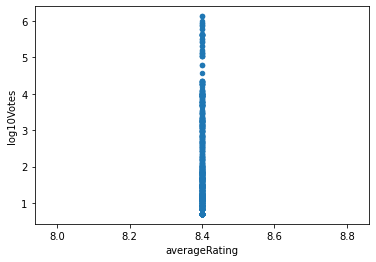

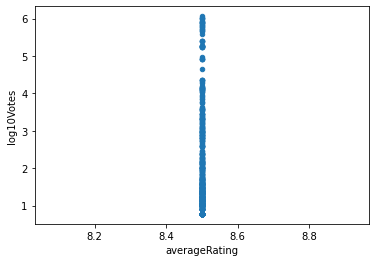

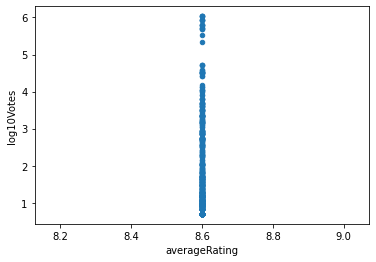

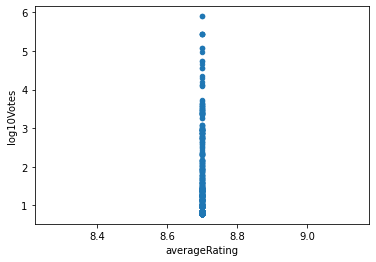

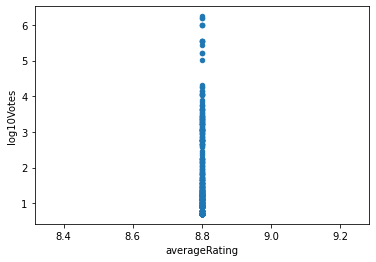

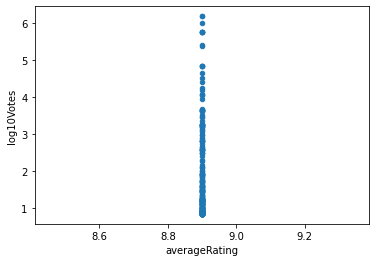

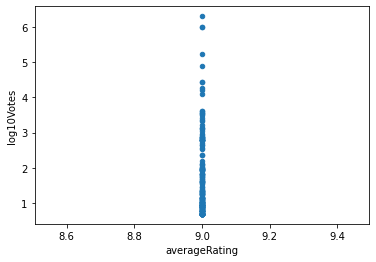

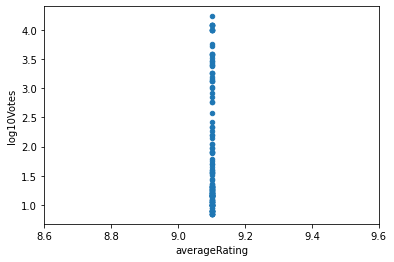

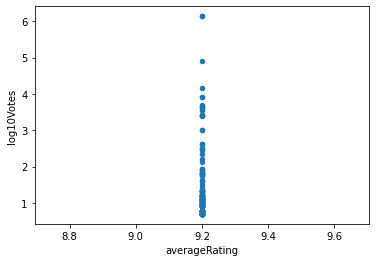

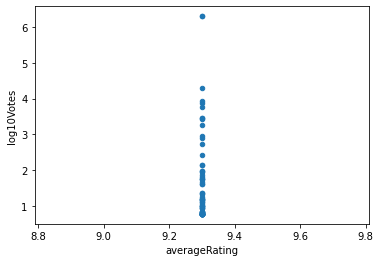

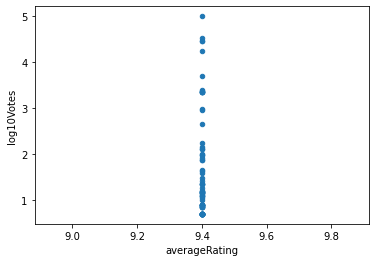

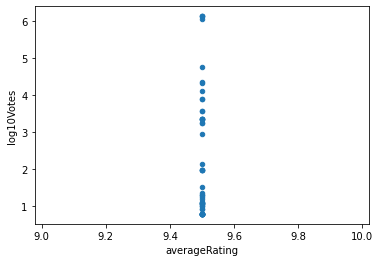

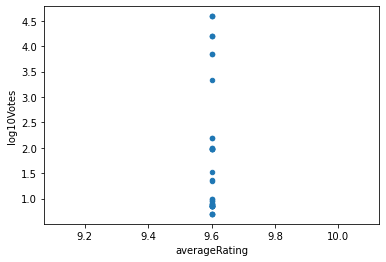

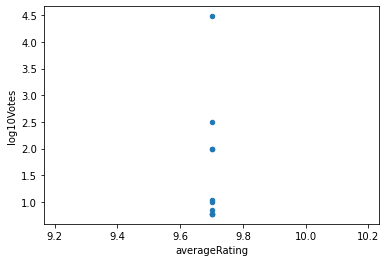

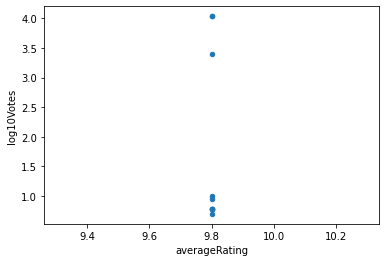

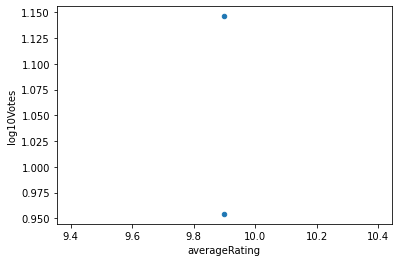

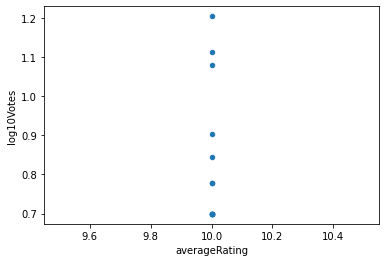

In [20]:
df_new.groupby('averageRating').plot('averageRating','log10Votes',kind='scatter',subplots= False)

#### 9
#### Perform linear regression on your data (averageRating vs log10Votes) 

  

In [21]:
# Imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV,cross_validate
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder  
from sklearn.impute import KNNImputer
from scipy.optimize import minimize

>>Missing values are present in the columns for which the log regression is based. Handling these values;

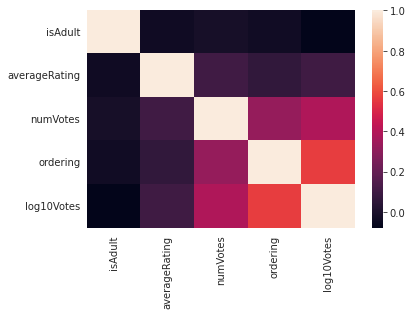

In [22]:
import seaborn as sns
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.heatmap(df_new.corr())

In [23]:
# new_list = []
# for i in range(len(df_new.columns)):
#   nunq = df_new[df_new.columns[i]].nunique()
#   if nunq <= 10:
#     print(f'{df_new.columns[i]} column has {nunq} unique values')
#     new_list.append(df_new.columns[i])
#   else:
#     continue
# new_list

In [24]:
# cat_variables = df_new[new_list]
# cat_dummies = pd.get_dummies(cat_variables, drop_first=True)cat_dummies.head()

In [25]:
# df_neww = df_new.drop(new_list, axis=1)
# df_neww = pd.concat([df_neww, cat_dummies], axis=1)
# listA = ['tconst', 'primaryTitle', 'originalTitle', 'startYear','endYear','genres','titleId','title', 'region', 'attributes','runtimeMinutes']
# df_neww = df_neww.drop(listA,axis=1)
# df_neww


In [26]:
# scaler = MinMaxScaler()
# scaled_df = pd.DataFrame(scaler.fit_transform(df_neww), columns = df_neww.columns)
# scaled_df.head()

In [27]:
# imputer = KNNImputer(n_neighbors=5)
# df_new = pd.DataFrame(imputer.fit_transform(scaled_df),columns = scaled_df.columns)

>>>  using fillna() to fill the missing values

In [28]:
df_new.fillna(method= 'ffill', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [29]:
df_new.head(2)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,log10Votes
74,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896,\N,1,"Documentary,Short",7.4,8509.0,tt0000012,11.0,The Arrival of a Train,XWW,en,imdbDisplay,\N,0,3.929879
76,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896,\N,1,"Documentary,Short",7.4,8509.0,tt0000012,13.0,The Arrival of a Train at La Ciotat,XWW,en,alternative,\N,0,3.929879





>  ` 9.1 Using sklearn` 




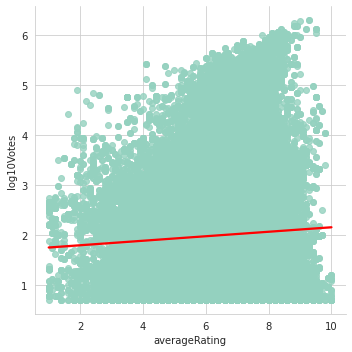

In [30]:
sns.lmplot(x='averageRating',y='log10Votes',data = df_new, line_kws={'color': 'red'})

R_2 score: 0.0032
MSE score: 0.9792
Slope: 0.0451


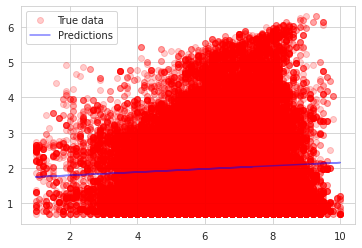

In [31]:
x = df_new['averageRating'].values.reshape(-1,1)
y = df_new['log10Votes']

# x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.2, random_state=101)
lm = LinearRegression()
lm.fit(x,y)



y_pred = lm.predict(x)

print (f'R_2 score: {r2_score(y,y_pred):.4f}')
print (f'MSE score: {mean_squared_error(y, y_pred):.4f}')
print(f'Slope: {lm.coef_[0]:.4f}')

plt.plot(x, y, 'ro', label='True data', alpha=0.2)
plt.plot(x, y_pred ,'b-', label='Predictions', alpha=0.5)
plt.legend(loc='best')






> `8.2 Using scipy` 




R_2 Score : 0.0032
Intercept:1.7032 
Slope: 0.0451 
RMSE:0.0022


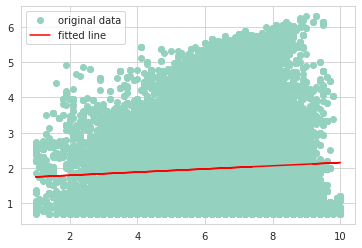

In [32]:
from scipy import stats

x = df_new['averageRating']
y = df_new['log10Votes']
scipy_lm = stats.linregress(x, y)


print(f"R_2 Score : {scipy_lm.rvalue**2:.4f}")

print(f'Intercept:{scipy_lm.intercept:.4f} \nSlope: {scipy_lm.slope:.4f} \nRMSE:{scipy_lm.stderr:.4f}')
#Plot the data along with the fitted line:

plt.plot(x, y, 'o', label='original data')
plt.plot(x, scipy_lm.intercept + scipy_lm.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()



>` 8.3 Using pytorch`

epoch: 20, loss = 1.4866
epoch: 40, loss = 1.0716
epoch: 60, loss = 1.0616
epoch: 80, loss = 1.0611
epoch: 100, loss = 1.0609


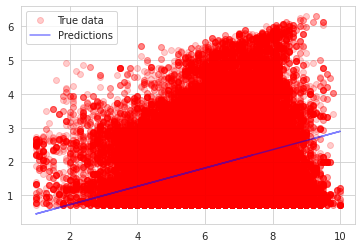

In [33]:
import torch
import torch.nn as nn
#from typing import Sequence, Union
!pip install pytorch-ignite
from ignite.exceptions import NotComputableError
from ignite.metrics import MeanSquaredError,root_mean_squared_error

xn , yn = df_new['averageRating'].values, df_new['log10Votes'].values
x = torch.FloatTensor(xn)
y = torch.FloatTensor(yn)
x= x.reshape(-1, 1)
y= y.reshape(-1, 1)

class Model(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = torch.nn.Linear(1,1)

  def forward(self,x):
    y_pred = self.linear(x)
    return y_pred

model = Model()
learning_rate = 0.001
loss_func = nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(), lr =learning_rate)

num_epoch = 100
for epoch in range(num_epoch):
  y_pred = model(x)
  loss= loss_func(y_pred,y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  
  if (epoch+1) % 20 == 0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


plt.clf()
plt.plot(x, y, 'ro', label='True data', alpha=0.2)
plt.plot(x, y_pred.detach().numpy(),'b-', label='Predictions', alpha=0.5)
plt.legend(loc='best')

In [35]:

mse_metric = MeanSquaredError()
mse_metric.reset()
mse_metric.update((y_pred, y))

print(mse_metric.compute())


1.0608995786516855



### LINEAR REGRESSION RESULTS
>Both models from scipy and sklearn have the same model parameters with slope gotten as 0.04521 following y = bx + c ( for linear models)
and coeffiient of determination (R squared score) gotten to be 0.0032. Pytorch model gives a different model parameter

>Since both models in scipy and sklearn are having similar values, using RMSE as a metric to check if models from pytorch, sklearn and scipy
> Model can be improved by the following means

>`Increase feature size`

>`Normalize model `

> `Performing cross validation and train test split`


